<a href="https://colab.research.google.com/github/wogur9503/AI-bootcamp-/blob/main/Game%20Sales%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **프로젝트 : 게임데이터 분석**

최소 요구 조건

1.   지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
2.   연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
3.   출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
vgames_data = pd.read_csv('vgames2.csv')
vgames_data.head()
vgames_data = vgames_data.drop(['Unnamed: 0'], axis=1)
vgames_data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


**지역에 따라 선호하는 게임 장르 분석**

In [3]:
# sales_data라는 새로운 데이터 프레임 생성
sales_data = pd.DataFrame()
sales_data['Genre'] = vgames_data['Genre']
sales_data['NA_Sales'] = vgames_data['NA_Sales']
sales_data['EU_Sales'] = vgames_data['EU_Sales']
sales_data['JP_Sales'] = vgames_data['JP_Sales']
sales_data['Other_Sales'] = vgames_data['Other_Sales']

In [4]:
# Sales데이터 스트링에서 인티저형태 변환
def sales_2int(a) :
  if a[-1] == 'M':
    a = a[:-1] 
    a = float(a) 
    a = a * 1000000 
  elif a[-1] == "K": 
    a = a[:-1] 
    a = float(a) 
    a = a * 1000 
  else : 
    a = float(a) 
    a = a * 1000000  
  return float(a / 1000000)

In [5]:
for i in range(len(sales_data['NA_Sales'])):
  sales_data['NA_Sales'][i] = sales_2int(sales_data['NA_Sales'][i])
for i in range(len(sales_data['EU_Sales'])):
  sales_data['EU_Sales'][i] = sales_2int(sales_data['EU_Sales'][i])
for i in range(len(sales_data['JP_Sales'])):
  sales_data['JP_Sales'][i] = sales_2int(sales_data['JP_Sales'][i])
for i in range(len(sales_data['NA_Sales'])):
  sales_data['Other_Sales'][i] = sales_2int(sales_data['Other_Sales'][i])

In [6]:
# 장르 순으로 sorting 후, 장르 인덱스를 다시 열로 빼냄.
sales_data.sort_values(by='Genre', inplace=True)
sales_data2 = sales_data.groupby('Genre').sum()
sales_data2 = sales_data2.reset_index()
sales_data2['Genre'] = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']

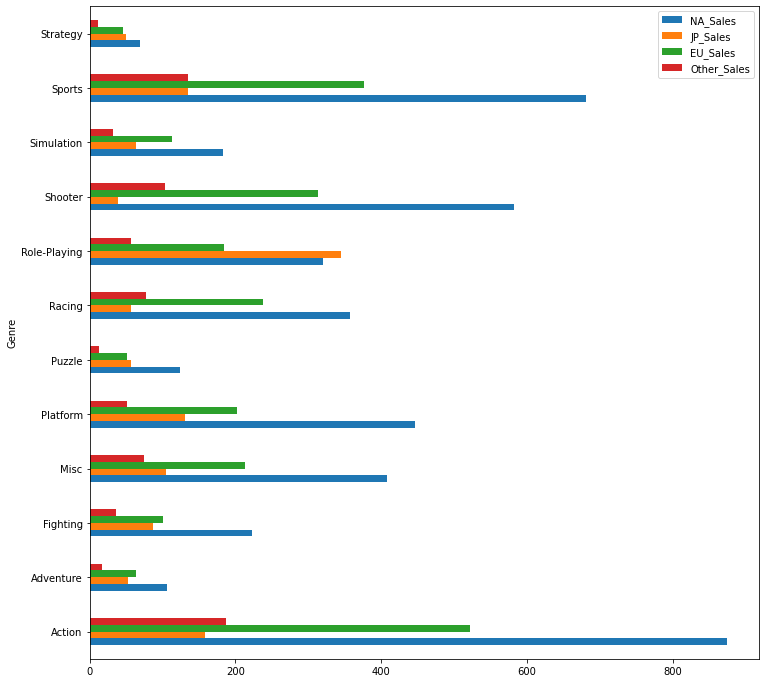

In [7]:
# 시각화
sales_data2.plot(x='Genre', y=["NA_Sales", "JP_Sales", "EU_Sales", "Other_Sales"], kind="barh",figsize=(12, 12))
plt.show()

# **결과 보고**
**NA에서는 전체적으로 높은 소비량을 보이고 그중에서도 Action을 선호하는 경향을 띄고,**

**EU는 NA에 비해 전체 소비량은 떨어지지만 마찬가지로 Action을 선호함.**

**JP는 EU와 비슷한 소비량을 드러내고 Role-Playing장르를 선호하며,**

**기타 국가들에서는 위 3개 분류 소비량보다 떨어지지만 선호장르는 Action으로 같다.**

# **연도별 게임 트렌드**

In [8]:
trend_data = pd.DataFrame()
vgames_data

trend_data['Year'] = vgames_data['Year']
trend_data['Platform'] = vgames_data['Platform']
trend_data['Genre'] = vgames_data['Genre']

# 결측치 제거
trend_data.fillna(0)
for i in range(len(trend_data['Year'])):
  if 1000 < float(trend_data['Year'][i]) < 2021:
    trend_data['Year'][i] = float(trend_data['Year'][i])
  else:
    trend_data['Year'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
def makeFive(a):
  a = int(a / 5)*5
  return a

In [10]:
# Year칼럼 5단위로 연도 묶음
trend_data['Year'] = trend_data['Year'].apply(makeFive)

In [11]:
trend_data['Year'] = trend_data['Year'].apply(str)

In [12]:
# groupby함수를 이용해서 Year별 플랫폼 파이 확인
trend_data_platform = trend_data.groupby(['Year'])['Platform'].value_counts()
trend_data_platform = pd.DataFrame(trend_data_platform)
# trend_data_genre = pd.DataFrame()
# trend_data_genre['Year'] = trend_data['Year']
# trend_data_genre['Genre'] = trend_data['Genre']

In [13]:
trend_data_platform.T

Year       0                               ... 2015                            2020
Platform  DS PS2 Wii X360 PS3  XB  PC PSP  ...  3DS  PS3  PC X360 WiiU Wii PSP   DS
Platform  46  46  40   35  33  26  23  23  ...  119  104  88   48   38   4   3    1

[1 rows x 96 columns]

# **분석 결과 보고**

집계되지 않은 연도(0)을 제외한 플랫폼 트렌드를 집계했다.
최초 연도를 10단위로 잘라 분석을 시도했지만 10단위로 자르기엔 시장변화가
그보다 빠르다는 판단 하에 5단위로 다시 분석했다.

집계된 디바이스(플랫폼)중 알고있는 디바이스가 많이 없고, 과거 게임 시장에 대한 지식이
전무하기 때문에 집계된 데이터 기반으로 흐름을 분석해보자면, 

게임기의 보급이 시작되었을 즈음으로 보이는 1980년에는 '2600'이라는 디바이스가 시장을
독점하다시피 했을 것으로 보인다.

85년에는 80년 당시 2위로 시장을 차지하던 "NES"가 선두주자로, 1위였던 "2600"이 2위로
시장 점유율을 뒤집어낸 것으로 보인다.

90년에는 "SNES"가 시장을 진입하며 시장점유율 1위를 달리지만, 다양한 디바이스가 시장을 진입한 것을
확인할 수 있다.

95년도부터 필자도 알고 있는 "PS"(플레이스테이션으로 추측)가 등장하며 등장과 거의 동시에 시장을 20년까지 장악한다.

05-10년도에는 "DS","Wii"와"PS2","PSP","PS3"등 플레이스테이션사와 타기업들의 경쟁이 보다 심화되었음을 보인다.

15년도부터 수집된 데이터 기반에는 게임시장(콘솔, 게임기)이 축소된 것으로 보인다.
추측컨데, 온라인 게임시장의 파이가 게임기 시장의 파이의 점유율을 크게 상회한 것으로 추측한다.

# **출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

In [14]:
sales_data["NA_Sales"].apply(float)
sales_data["EU_Sales"].apply(float)
sales_data["JP_Sales"].apply(float)
sales_data["Other_Sales"].apply(float)

0        0.00
10068    0.06
10062    0.02
2291     0.00
10061    0.01
         ... 
15526    0.36
16091    0.01
16431    0.01
16555    0.01
16587    0.10
Name: Other_Sales, Length: 16598, dtype: float64

In [15]:
sales_data

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0,0,0
10068,Action,0.26,0.13,0,0.06
10062,Action,0.18,0.04,0,0.02
2291,Action,0,0.01,0,0
10061,Action,0.02,0.07,0,0.01
...,...,...,...,...,...
15526,NaN,1,0.76,0.26,0.36
16091,NaN,0.14,0,0,0.01
16431,NaN,0.13,0,0,0.01
16555,NaN,0,0.03,0,0.01


In [16]:
#새로운 데이터프레임 생성 / 게임별 총 소비량을 더한 "Total_Sales"라는 컬럼 생성
vgames_data_game = pd.DataFrame()
vgames_data_game["Name"] = vgames_data["Name"]
vgames_data_game["Platform"] = vgames_data["Platform"]
vgames_data_game["Genre"] = vgames_data["Genre"]
vgames_data_game["Publisher"] = vgames_data["Publisher"]
vgames_data_game["Total_Sales"] = float(0)
for i in range(len(vgames_data["Name"])):
  vgames_data_game["Total_Sales"][i] = (sales_data["NA_Sales"][i] + sales_data["EU_Sales"][i] + sales_data["JP_Sales"][i] + sales_data["Other_Sales"][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [17]:
# 많이 판매된 순으로 정렬하여 상위권을 차지한 게임 순으로 데이터 조회
vgames_data_game.sort_values(by=['Total_Sales'], ascending=False, inplace=True)
vgames_data_game_topten = vgames_data_game.head(10)
vgames_data_game_topten.reset_index(drop=True, inplace=True)
vgames_data_game_topten

,Name,Platform,Genre,Publisher,Total_Sales
0,Wii Sports,Wii,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,Racing,Nintendo,35.83
3,Wii Sports Resort,Wii,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,31.38
5,Tetris,GB,Puzzle,Nintendo,30.26
6,New Super Mario Bros.,DS,Platform,Nintendo,30.01
7,Wii Play,Wii,Misc,Nintendo,29.01
8,New Super Mario Bros. Wii,Wii,Platform,Nintendo,28.61
9,Duck Hunt,NES,Shooter,Nintendo,28.31


# **출고량이 높은 게임에 대한 분석**

*   상위 10개의 게임을 출력한 결과 Nintendo사의 게임이 상위랭크를 전부 차지하고 있음을 확인
*   플랫폼(디바이스)은 Wii가 절반을 차지하고 있고, GB,NES가 각 2개씩 랭크되어 있고, DS가 6위로 1개 랭크
*   눈에 띄는 특이점은 2-10위까지는 엇비슷한 차이를 보이지만, 1위와 2위의 차이는 2배 이상 차이가 남.







# **분석한 자료 시각화**

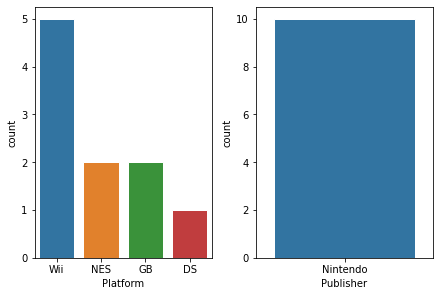

In [18]:
fig, ax = plt.subplots(ncols=2, constrained_layout=True)
# 차트 배경 설정
sns.set_style('whitegrid')

sns.countplot(x="Platform", data=vgames_data_game_topten, ax=ax[0])
sns.countplot(x="Publisher", data=vgames_data_game_topten, ax=ax[1])

plt.show()

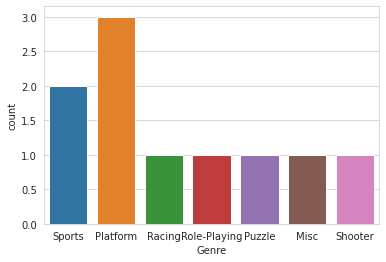

In [19]:
sns.countplot(x="Genre", data=vgames_data_game_topten)

# **추가 검증**
**가설1 : 명료한 게임 이름이 게임 매출에 도움이 될 것이다**


In [20]:
# vgames_data_name라는 Name_length(게임명의 길이)칼럼을 추가한 데이터 프레임 생성
vgames_data_name = pd.DataFrame()
vgames_data_name['Name'] = vgames_data['Name']
vgames_data_name['Total_Sales'] = vgames_data_game["Total_Sales"]
vgames_data_name['Name_length'] = 0
for i in range(len(vgames_data['Name'])):
  vgames_data_name['Name_length'][i] = len(vgames_data['Name'][i])
vgames_data_name

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Name,Total_Sales,Name_length
0,Candace Kane's Candy Factory,0.04,28
1,The Munchables,0.18,14
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,0.02,46
3,Deal or No Deal: Special Edition,0.04,32
4,Ben 10 Ultimate Alien: Cosmic Destruction,0.25,41
...,...,...,...
16593,Ice Age 2: The Meltdown,0.20,23
16594,Rainbow Islands: Revolution,0.01,27
16595,NBA 2K16,0.79,8
16596,Toukiden: The Age of Demons,0.38,27



해당 데이터를 **two sample Chi-squared test**를 통해 검증해보려 한다.
*   귀무가설 : 게임명의 길이와 판매율은 연관이 없다.
*   대립가설 : 게임명의 길이와 판매율은 연관이 있다.
*   신뢰도 : 95%

In [21]:
Sales_cut = pd.cut(vgames_data_name['Total_Sales'], 3).astype('category') # 몸무게 데이터를 동일 길이로 3등분한다.
Length_cut = pd.cut(vgames_data_name['Name_length'], 3).astype('category') # 플리퍼 데이터를 동일 길이로 3등분한다.
data_123 = pd.crosstab(Sales_cut,	Length_cut)
data_123.columns = ['Few', 'Moderate', 'A lot']
data_123.index = ['Short', 'Middle', 'Long']
data_123

,Few,Moderate,A lot
Short,15443,1115,30
Middle,9,0,0
Long,1,0,0


In [22]:
chi, pvalue, _, _ = stats.chi2_contingency(data_123, correction=False)
chi, pvalue

(0.7414031307952142, 0.9461266256827688)

pvalue가 0.05보다 크기 때문에 귀무가설을 채택한다. 즉, 판매율와 이름의 길이는 연관이 없다.

pvalue가 1에 거의 육박하기 때문에 꽤 높은 신뢰도로 증명 되었다.

# **추가 검증**
**가설2 : 퍼블리셔마다 출시를 선호하는 장르가 있을 것이다**


In [26]:
vgames_data_publisher = pd.DataFrame()
vgames_data_publisher['Publisher'] = vgames_data['Publisher']
vgames_data_publisher['Genre'] = vgames_data['Genre']
vgames_data_publisher.head(10)

,Publisher,Genre
0,Destineer,Action
1,Namco Bandai Games,Action
2,Alchemist,Adventure
3,Zoo Games,Misc
4,D3Publisher,Platform
5,Konami Digital Entertainment,Sports
6,Deep Silver,Simulation
7,Tecmo Koei,Action
8,Sega,Adventure
9,THQ,Action
